In [1]:
from os import walk
from os.path import join

import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from bs4 import BeautifulSoup
from wordcloud import WordCloud
from PIL import Image
import numpy as np

from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
# Load dataset
csv_file_path = "C:/Users/rachi/OneDrive/Desktop/enron_spam_data.csv"
df = pd.read_csv(csv_file_path, encoding='latin1')

# Keep only necessary columns
df = df[['Message', 'Spam/Ham']]

# Drop rows with missing values
df.dropna(inplace=True)

# Display dataset info
print("Dataset loaded successfully.")
print(df.head())


Dataset loaded successfully.
                                             Message  Spam/Ham
1  gary , production from the high island larger ...         0
2             - calpine daily gas nomination 1 . doc         0
3  fyi - see note below - already done .\nstella\...         0
4  fyi .\n- - - - - - - - - - - - - - - - - - - -...         0
5  jackie ,\nsince the inlet to 3 river plant is ...         0


In [3]:

# File paths (Updated to use only CSV dataset)
DATASET_PATH = "C:/Users/rachi/OneDrive/Desktop/enron_spam_data.csv"

# Constants
SPAM_CAT = 1
HAM_CAT = 0
VOCAB_SIZE = 2500

print("Using dataset:", DATASET_PATH)


Using dataset: C:/Users/rachi/OneDrive/Desktop/enron_spam_data.csv


In [4]:

import pandas as pd

# Load dataset
DATASET_PATH = "C:/Users/rachi/OneDrive/Desktop/enron_spam_data.csv"
df = pd.read_csv(DATASET_PATH, encoding='latin1')

# Drop rows where 'Message' is missing
df = df.dropna(subset=['Message'])

# Check if there are valid messages
if not df.empty:
    email_body = df['Message'].iloc[0]  # Get the first available email body
    print(email_body)
else:
    print("Error: No valid email bodies found in the dataset.")



gary , production from the high island larger block a - 1 # 2 commenced on
saturday at 2 : 00 p . m . at about 6 , 500 gross . carlos expects between 9 , 500 and
10 , 000 gross for tomorrow . vastar owns 68 % of the gross production .
george x 3 - 6992
- - - - - - - - - - - - - - - - - - - - - - forwarded by george weissman / hou / ect on 12 / 13 / 99 10 : 16
am - - - - - - - - - - - - - - - - - - - - - - - - - - -
daren j farmer
12 / 10 / 99 10 : 38 am
to : carlos j rodriguez / hou / ect @ ect
cc : george weissman / hou / ect @ ect , melissa graves / hou / ect @ ect
subject : vastar resources , inc .
carlos ,
please call linda and get everything set up .
i ' m going to estimate 4 , 500 coming up tomorrow , with a 2 , 000 increase each
following day based on my conversations with bill fischer at bmar .
d .
- - - - - - - - - - - - - - - - - - - - - - forwarded by daren j farmer / hou / ect on 12 / 10 / 99 10 : 34
am - - - - - - - - - - - - - - - - - - - - - - - - - - -
enron north ameri

In [5]:
def generate_squares(N):
    for my_number in range(N):
        yield my_number ** 2

In [6]:
for i in generate_squares(3):
    print(i, end = ' -> ')

0 -> 1 -> 4 -> 

In [7]:
def email_body_generator(path): 
    
    for root, dirnames, filenames in walk(path):
        for file_name in filenames:
            
            filepath = join(root, file_name)
        
            stream = open(filepath, encoding='latin-1')

            is_body = False
            lines = []

            for line in stream: 
                if is_body:
                    lines.append(line)
                elif line =='\n':
                    is_body = True
            stream.close()

            email_body = '\n'.join(lines)

            yield file_name, email_body

In [8]:
def df_from_directory(path, classification):
    rows = []
    row_names = []
    
    for file_name, email_body in email_body_generator(path):
        rows.append({'MESSAGE': email_body, 'CATEGORY': classification})
        row_names.append(file_name)
        
    return pd.DataFrame(rows, index = row_names)

In [9]:
import pandas as pd

# Load dataset
DATASET_PATH = "C:/Users/rachi/OneDrive/Desktop/enron_spam_data.csv"
df = pd.read_csv(DATASET_PATH, encoding='latin1')

# Ensure necessary columns exist
if 'Message' in df.columns and 'Spam/Ham' in df.columns:
    # Separate spam and ham emails
    spam_emails = df[df['Spam/Ham'] == 1]
    ham_emails = df[df['Spam/Ham'] == 0]

    # Display first few spam emails
    print("Spam Emails:")
    print(spam_emails.head())

    # Display first few ham emails
    print("\nHam Emails:")
    print(ham_emails.head())

else:
    print("Error: Required columns ('Message', 'Spam/Ham') not found in dataset.")


Spam Emails:
      Message ID                                            Subject  \
3672        3672  dobmeos with hgh my energy level has gone up !...   
3673        3673          your prescription is ready . . oxwq s f e   
3674        3674                              get that new car 8434   
3675        3675                                await your response   
3676        3676  coca cola , mbna america , nascar partner with...   

                                                Message  Spam/Ham        Date  
3672  introducing\ndoctor - formulated\nhgh\nhuman g...         1  2003-12-18  
3673  low cost prescription medications\nsoma , ultr...         1  2003-12-18  
3674  people nowthe weather or climate in any partic...         1  2003-12-18  
3675  dear partner ,\nwe are a team of government of...         1  2003-12-18  
3676  stock\nprofile\nabout\ncompany\ninvestment\nhi...         1  2003-12-18  

Ham Emails:
   Message ID                       Subject  \
0           0  chris

In [10]:
spam_emails.shape

(17171, 5)

In [11]:
ham_emails.shape

(16545, 5)

In [12]:
data = pd.concat([spam_emails, ham_emails])
print('Shape of entire dataframe is ', data.shape)
data.head()

Shape of entire dataframe is  (33716, 5)


Message ID                                            Subject  \
3672        3672  dobmeos with hgh my energy level has gone up !...   
3673        3673          your prescription is ready . . oxwq s f e   
3674        3674                              get that new car 8434   
3675        3675                                await your response   
3676        3676  coca cola , mbna america , nascar partner with...   

                                                Message  Spam/Ham        Date  
3672  introducing\ndoctor - formulated\nhgh\nhuman g...         1  2003-12-18  
3673  low cost prescription medications\nsoma , ultr...         1  2003-12-18  
3674  people nowthe weather or climate in any partic...         1  2003-12-18  
3675  dear partner ,\nwe are a team of government of...         1  2003-12-18  
3676  stock\nprofile\nabout\ncompany\ninvestment\nhi...         1  2003-12-18

In [13]:
data.tail()

Message ID                        Subject  \
29211       29211   tw weekend scheduled volumes   
29212       29212      fw : re ivanhoe e . s . d   
29213       29213  fw : abandoned pipe ownership   
29214       29214   fw : tw question in amarillo   
29215       29215      fw : re ivanhoe e . s . d   

                                                 Message  Spam/Ham        Date  
29211  march 2002 scheduled\nscheduled\nfriday 22\nwe...         0  2002-03-25  
29212  fyi , kim .\n- - - - - original message - - - ...         0  2002-03-25  
29213  fyi , kim .\n- - - - - original message - - - ...         0  2002-03-25  
29214  fyi , kim .\n- - - - - original message - - - ...         0  2002-03-25  
29215  fyi , kim .\n- - - - - original message - - - ...         0  2002-03-25

In [14]:
# check if any message bodies are null
data['Message'].isnull().values.any()

np.True_

In [15]:
# check if there are empty emails
(data.Message.str.len() == 0).any()

np.False_

In [16]:
empty_messages = (data['Message'].str.len() == 0).sum()

# Convert to Python int for better readability
print(int(empty_messages))  # Outputs a normal integer


0


In [17]:
data[data.Message.str.len() == 0].index

Index([], dtype='int64')

In [18]:
data.shape

(33716, 5)

In [19]:
document_ids = range(0, len(data.index))
data['DOC_ID'] = document_ids

In [20]:
data['FILE_NAME'] = data.index
data.set_index('DOC_ID', inplace=True)
data.head()

Message ID                                            Subject  \
DOC_ID                                                                  
0             3672  dobmeos with hgh my energy level has gone up !...   
1             3673          your prescription is ready . . oxwq s f e   
2             3674                              get that new car 8434   
3             3675                                await your response   
4             3676  coca cola , mbna america , nascar partner with...   

                                                  Message  Spam/Ham  \
DOC_ID                                                                
0       introducing\ndoctor - formulated\nhgh\nhuman g...         1   
1       low cost prescription medications\nsoma , ultr...         1   
2       people nowthe weather or climate in any partic...         1   
3       dear partner ,\nwe are a team of government of...         1   
4       stock\nprofile\nabout\ncompany\ninvestment\nhi...         1   

              Date  FILE_NAME  
DOC_ID                         
0       2003-12-18       3672  
1       2003-12-18       3673  
2       2003-12-18       3674  
3       2003-12-18       3675  
4       2003-12-18       3676

In [21]:
data.tail()

Message ID                        Subject  \
DOC_ID                                              
33711        29211   tw weekend scheduled volumes   
33712        29212      fw : re ivanhoe e . s . d   
33713        29213  fw : abandoned pipe ownership   
33714        29214   fw : tw question in amarillo   
33715        29215      fw : re ivanhoe e . s . d   

                                                  Message  Spam/Ham  \
DOC_ID                                                                
33711   march 2002 scheduled\nscheduled\nfriday 22\nwe...         0   
33712   fyi , kim .\n- - - - - original message - - - ...         0   
33713   fyi , kim .\n- - - - - original message - - - ...         0   
33714   fyi , kim .\n- - - - - original message - - - ...         0   
33715   fyi , kim .\n- - - - - original message - - - ...         0   

              Date  FILE_NAME  
DOC_ID                         
33711   2002-03-25      29211  
33712   2002-03-25      29212  
33713   2002-03-25      29213  
33714   2002-03-25      29214  
33715   2002-03-25      29215

In [22]:
# Replace 'Spam/Ham' with the correct column name from your dataset
if 'Spam/Ham' in data.columns:
    print(data['Spam/Ham'].value_counts())
else:
    print("Error: No category column found in the dataset.")


Spam/Ham
1    17171
0    16545
Name: count, dtype: int64


In [23]:
# Replace 'Spam/Ham' with the actual column name
if 'Spam/Ham' in data.columns:
    amount_of_spam = data['Spam/Ham'].value_counts().get(1, 0)
    amount_of_ham = data['Spam/Ham'].value_counts().get(0, 0)

    print(f"Spam Emails: {amount_of_spam}")
    print(f"Ham Emails: {amount_of_ham}")
else:
    print("Error: No category column found in the dataset.")


Spam Emails: 17171
Ham Emails: 16545


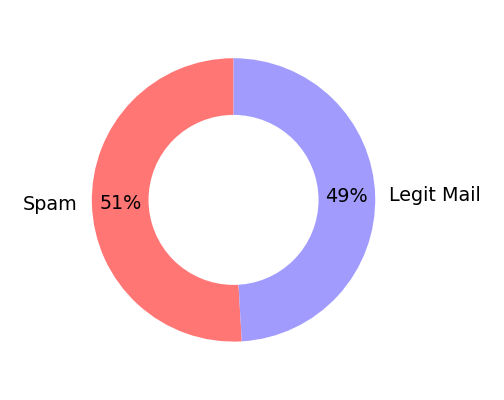

In [24]:
category_names = ['Spam', 'Legit Mail']
sizes = [amount_of_spam, amount_of_ham]
custom_colors = ['#ff7675','#a29bfe']


plt.figure(figsize=(2,2), dpi = 230)
plt.pie(sizes, labels=category_names, textprops={'fontsize': 6}, startangle = 90, autopct = '%1.0f%%', colors = custom_colors, pctdistance = 0.8)


#making a donut

centre_circle = plt.Circle((0,0), radius = 0.6, fc = 'white')
plt.gca().add_artist(centre_circle)

plt.show()

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rachi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rachi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from nltk.stem import PorterStemmer
import pandas as pd

# Ensure required NLTK packages are downloaded
nltk.download('punkt', force=True)  # Force re-download to fix errors
nltk.download('stopwords')

# Initialize stemmer and stopwords
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_msg_no_html(message):
    if pd.isna(message) or not isinstance(message, str) or message.strip() == "":
        return ["empty"]  # Prevent empty lists

    soup = BeautifulSoup(str(message), 'html.parser')  
    cleaned_text = soup.get_text()
    
    try:
        words = word_tokenize(cleaned_text.lower())  
    except LookupError:
        words = cleaned_text.lower().split()

    filtered_words = [stemmer.stem(word) for word in words if word.isalpha() and len(word) > 1 and word not in stop_words]

    return filtered_words if filtered_words else ["empty"]  # Prevent empty lists

# Load dataset (assuming CSV format)
data = pd.read_csv("C:/Users/rachi/OneDrive/Desktop/enron_spam_data.csv")  # Change file path as needed

# Check the available column names
print("Dataset Columns:", data.columns)

# Ensure correct column name for emails
email_column = "Message"  # Update if your column name is different

# Apply function to all emails while handling NaN values
data["Cleaned_Message"] = data[email_column].astype(str).fillna("").apply(clean_msg_no_html)

# Display first few cleaned emails
print(data[["Cleaned_Message"]].head())



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rachi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rachi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Dataset Columns: Index(['Message ID', 'Subject', 'Message', 'Spam/Ham', 'Date'], dtype='object')
                                     Cleaned_Message
0                                              [nan]
1  [gari, product, high, island, larger, block, c...
2                    [calpin, daili, ga, nomin, doc]
3  [fyi, see, note, alreadi, done, stella, forwar...
4  [fyi, forward, lauri, allen, hou, ect, pm, kim...


In [29]:
%%time

#use apply() on all the messages in the dataframe
nested_list = data.Message.apply(clean_msg_no_html)

CPU times: total: 1min 43s
Wall time: 2min 4s


In [30]:
nested_list.head()

0                                              [empty]
1    [gari, product, high, island, larger, block, c...
2                      [calpin, daili, ga, nomin, doc]
3    [fyi, see, note, alreadi, done, stella, forwar...
4    [fyi, forward, lauri, allen, hou, ect, pm, kim...
Name: Message, dtype: object

In [31]:
nested_list.tail()

33711    [hello, welcom, gigapharm, onlinn, shop, presc...
33712    [got, earlier, expect, wrap, cautious, impress...
33713    [readi, rock, let, man, rise, solitud, show, u...
33714    [learn, last, time, longer, bed, read, plod, net]
33715    [hi, need, softwar, give, link, http, zk, net,...
Name: Message, dtype: object

In [32]:
doc_ids_spam = data[data["Spam/Ham"] == 1].index
doc_ids_ham = data[data["Spam/Ham"] == 0].index

In [33]:
nested_list_ham = nested_list.loc[doc_ids_ham]

In [34]:
nested_list_ham.shape

(16545,)

In [35]:
nested_list_spam = nested_list.loc[doc_ids_spam]

In [36]:
nested_list_spam.shape

(17171,)

In [37]:
flat_list_ham = [item for sublist in nested_list_ham for item in sublist]
normal_words = pd.Series(flat_list_ham).value_counts()

normal_words.shape[0]

37818

In [38]:
normal_words[:10]

enron      59783
ect        35324
hou        16945
compani    14683
pleas      13251
would      12509
com        12399
subject    12111
said       10833
market      9855
Name: count, dtype: int64

In [39]:
flat_list_spam = [item for sublist in nested_list_spam for item in sublist]
spammy_words = pd.Series(flat_list_spam).value_counts()

spammy_words.shape[0]

96058

In [40]:
spammy_words[:10]

compani      13879
com          11550
http          8758
inform        8726
email         8524
pleas         7619
secur         7426
price         7028
statement     6913
mail          6759
Name: count, dtype: int64

In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# ✅ Generate text from ham messages
ham_str = ' '.join(flat_list_ham)

# ✅ Create a word cloud without a mask
word_cloud = WordCloud(
    background_color='white',
    max_words=500,
    colormap='ocean',
    max_font_size=200,
    width=800, height=400  # Define image size manually
)

word_cloud.generate(ham_str.upper())

# ✅ Display the word cloud
plt.figure(figsize=(16, 8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()


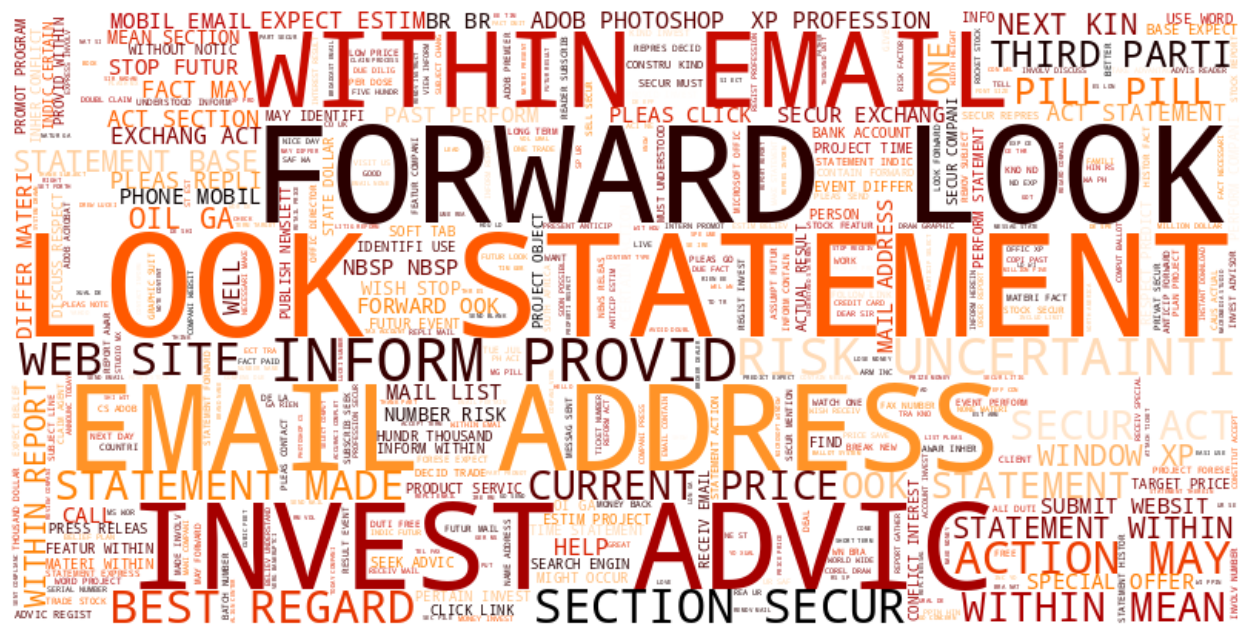

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# ✅ Generate text from spam messages
spam_str = ' '.join(flat_list_spam)

# ✅ Create a word cloud without a mask
word_cloud = WordCloud(
    background_color='white',
    max_words=2000,
    colormap='gist_heat',  # 🔥 Heatmap colors
    max_font_size=300,
    width=800, height=400  # Define manual size
)

word_cloud.generate(spam_str.upper())

# ✅ Display the word cloud
plt.figure(figsize=(16, 8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [43]:
stemmed_nested_list = data.Message.apply(clean_msg_no_html)
flat_stemmed_list = [item for sublist in stemmed_nested_list for item in sublist]

In [45]:
unique_words = pd.Series(flat_stemmed_list).value_counts()
print('Number of unique words', unique_words.shape[0])
unique_words.head()

Number of unique words 116529


enron      59786
ect        35664
compani    28562
com        23949
pleas      20870
Name: count, dtype: int64

In [46]:
frequent_words = unique_words[0:VOCAB_SIZE]
print('Most common words: \n', frequent_words[:10])

Most common words: 
 enron      59786
ect        35664
compani    28562
com        23949
pleas      20870
hou        17264
time       15537
would      15461
price      15202
inform     14743
Name: count, dtype: int64


In [47]:
word_ids = list(range(0, VOCAB_SIZE))
vocab = pd.DataFrame({'VOCAB_WORD': frequent_words.index.values}, index = word_ids)
vocab.index.name = 'WORD_ID'
vocab.head()

VOCAB_WORD
WORD_ID           
0            enron
1              ect
2          compani
3              com
4            pleas

In [48]:
print(type(stemmed_nested_list))
print(len(stemmed_nested_list))           # Number of rows
print(max(len(x) for x in stemmed_nested_list))  # Max number of columns per row


<class 'pandas.core.series.Series'>
33716
20985


In [49]:
# Try with a smaller subset first to prevent crashing
word_columns_df = pd.DataFrame.from_records(stemmed_nested_list[:10000])
word_columns_df.head()

0        1      2        3       4       5        6         7       8     \
0   empty     None   None     None    None    None     None      None    None   
1    gari  product   high   island  larger   block  commenc  saturday   gross   
2  calpin    daili     ga    nomin     doc    None     None      None    None   
3     fyi      see   note  alreadi    done  stella  forward    stella   morri   
4     fyi  forward  lauri    allen     hou     ect       pm  kimberli  vaughn   

    9     ...  4057  4058  4059  4060  4061  4062  4063  4064  4065  4066  
0   None  ...  None  None  None  None  None  None  None  None  None  None  
1  carlo  ...  None  None  None  None  None  None  None  None  None  None  
2   None  ...  None  None  None  None  None  None  None  None  None  None  
3    hou  ...  None  None  None  None  None  None  None  None  None  None  
4     pm  ...  None  None  None  None  None  None  None  None  None  None  

[5 rows x 4067 columns]

In [50]:
word_columns_df.shape

(10000, 4067)

In [51]:
# Slice the 'Spam/Ham' labels to match the number of rows in word_columns_df
y = data["Spam/Ham"][:10000]

# Now you can split the data
X_train, X_test, y_train, y_test = train_test_split(word_columns_df, y, test_size=0.3, random_state=42)


In [52]:
# In your preprocessing script

import pandas as pd

# Save training and testing features
X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)

# Save training and testing labels
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)


In [53]:
print('Number of training samples:', X_train.shape[0])
print('Fraction of training set:', X_train.shape[0]/word_columns_df.shape[0 ])

Number of training samples: 7000
Fraction of training set: 0.7


In [54]:
X_train.index.name = X_test.index.name = 'DOC_ID'
X_train.head()

0         1         2         3      4       5         6     \
DOC_ID                                                                   
9069       dear        dr  kaminski     thank   much   natur        ga   
2603     attach  question      next      week   neon  lesson       fun   
7738      thank      much      vinc      agre  molli    vinc  kaminski   
1579    septemb      teco       tap       hpl  iferc   enron        ls   
5058     custom  intellig  strategi  frontlin   focu  intern       inc   

          7       8         9     ...  4057  4058  4059  4060  4061  4062  \
DOC_ID                            ...                                       
9069    inform  electr     price  ...  None  None  None  None  None  None   
2603       feb     doc      None  ...  None  None  None  None  None  None   
7738        pm   molli      mage  ...  None  None  None  None  None  None   
1579       hpl     lsk        ic  ...  None  None  None  None  None  None   
5058      link    hous  broadway  ...  None  None  None  None  None  None   

        4063  4064  4065  4066  
DOC_ID                          
9069    None  None  None  None  
2603    None  None  None  None  
7738    None  None  None  None  
1579    None  None  None  None  
5058    None  None  None  None  

[5 rows x 4067 columns]

In [55]:
y_train.head()

9069    0
2603    0
7738    0
1579    0
5058    1
Name: Spam/Ham, dtype: int64

In [56]:
word_index = pd.Index(vocab.VOCAB_WORD)
from scipy.sparse import coo_matrix

def make_sparse_matrix(df, indexed_words, labels):
    """
    Returns a DataFrame in the format: LABEL, DOC_ID, OCCURRENCE, WORD_ID.
    
    df: A DataFrame with words in columns and document IDs as index (X_train or X_test)
    indexed_words: Index of words ordered by word ID
    labels: Category as a Series (y_train or y_test)
    """
    
    word_set = set(indexed_words)
    
    # Identify positions where words exist in vocab
    mask = df.map(lambda x: x in word_set)
    doc_ids, word_texts = np.where(mask.values)  # Get row & column indices
    
    # Get corresponding words
    words_found = df.values[doc_ids, word_texts]
    
    # Convert words to word indices
    word_ids = [indexed_words.get_loc(word) for word in words_found]
    
    # Map row indices to actual document IDs
    doc_indices = df.index[doc_ids]  # These should match X_train.index
    
    # Ensure labels align with doc_indices
    labels_mapped = labels.reindex(doc_indices).values  # Safe mapping
    
    # Create DataFrame with the expected columns
    sparse_df = pd.DataFrame({
        "LABEL": labels_mapped,
        "DOC_ID": doc_indices,
        "OCCURENCE": 1,  # Each word appears once per row
        "WORD_ID": word_ids
    })

    return sparse_df

In [57]:
%%time
sparse_train_df = make_sparse_matrix(X_train, word_index, y_train)

CPU times: total: 8.42 s
Wall time: 10.3 s


In [58]:
sparse_train_df[:5]

LABEL  DOC_ID  OCCURENCE  WORD_ID
0      0    9069          1      405
1      0    9069          1      816
2      0    9069          1      142
3      0    9069          1       18
4      0    9069          1      171

In [59]:
train_grouped = sparse_train_df.groupby(['DOC_ID', 'WORD_ID', 'LABEL']).sum()
train_grouped.head()

OCCURENCE
DOC_ID WORD_ID LABEL           
1      0       0              1
       1       0             17
       4       0              2
       5       0             10
       6       0              1

In [60]:
vocab.at[0,'VOCAB_WORD']

'enron'

In [61]:
train_grouped = train_grouped.reset_index()
train_grouped.head() 

DOC_ID  WORD_ID  LABEL  OCCURENCE
0       1        0      0          1
1       1        1      0         17
2       1        4      0          2
3       1        5      0         10
4       1        6      0          1

In [62]:
train_grouped.tail()

DOC_ID  WORD_ID  LABEL  OCCURENCE
382373    9999     1466      1          1
382374    9999     1751      1          1
382375    9999     1773      1          1
382376    9999     1931      1          1
382377    9999     1945      1          1

In [63]:
vocab.at[1908, 'VOCAB_WORD']

'fl'

In [64]:
data.Message[5795]

"forum\njoe ,\ni would like to invite you to an off - site meeting of john griebling ' s\norganization\nand the research group .\ndate : april 27 - april 29\nlocation : breckenridge , colorado\nas you know , john griebling is managing the network design and construction\nproject\ncurrently under way in ebs . the research group is actively involved in this\neffort\nwhich requires advanced quantitative skills in the area of stochastic\noptimization and\nstochastic processes ( for modeling and forecasting internet traffic flows ) .\nthe objective of this meeting is to develop common language and accomplish\ntransfer\nof skills between the two groups , to facilitate cooperation on this project\nin the future .\nwe are inviting ken rice and kevin hannon to this meeting . we would\nappreciate if you could\nspeak , together with kevin and ken , on strategic directions of ebs . it is\nimportant for a group\nof technical people , with relatively specialized technical skills , to\nunderstand the

In [65]:
train_grouped.shape

(382378, 4)

In [66]:
TRAINING_DATA_FILE="train-data.txt"
np.savetxt(TRAINING_DATA_FILE, train_grouped, fmt='%d')

In [67]:
X_test.head()

0         1         2            3       4      5         6     \
DOC_ID                                                                      
6252    forward  patricia    tlapek          hou     ect     pm  barchart   
4684      empty      None      None         None    None   None      None   
1731         hi     daren    attach  spreadsheet   could    use      help   
4742         hi       new   product        offer    soft    tab     ciali   
4521       save      ship  worldwid        zocor  viagra  ciali      soma   

           7        8         9     ...  4057  4058  4059  4060  4061  4062  \
DOC_ID                              ...                                       
6252        aol      com  patricia  ...  None  None  None  None  None  None   
4684       None     None      None  ...  None  None  None  None  None  None   
1731    collect     hour     group  ...  None  None  None  None  None  None   
4742       soft      tab       new  ...  None  None  None  None  None  None   
4521    lipitor  levitra   meridia  ...  None  None  None  None  None  None   

        4063  4064  4065  4066  
DOC_ID                          
6252    None  None  None  None  
4684    None  None  None  None  
1731    None  None  None  None  
4742    None  None  None  None  
4521    None  None  None  None  

[5 rows x 4067 columns]

In [68]:
y_test.head()

6252    0
4684    1
1731    0
4742    1
4521    1
Name: Spam/Ham, dtype: int64

In [69]:
X_test.shape

(3000, 4067)

In [70]:
%%time

sparse_test_df = make_sparse_matrix(X_test, word_index, y_test)

CPU times: total: 4.03 s
Wall time: 4.71 s


In [71]:
sparse_test_df.shape

(276058, 4)

In [72]:
test_grouped = sparse_test_df.groupby(['DOC_ID', 'WORD_ID', 'LABEL']).sum().reset_index()
test_grouped.head()

DOC_ID  WORD_ID  LABEL  OCCURENCE
0       0     1756      0          1
1       3        1      0         18
2       3        5      0         10
3       3       12      0          3
4       3       18      0          1

In [73]:
test_grouped.shape

(163300, 4)

In [74]:
TEST_DATA_FILE="test-data.txt"
np.savetxt(TEST_DATA_FILE, test_grouped, fmt = '%d')